In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,Y_train),(X_test,Y_test)= keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

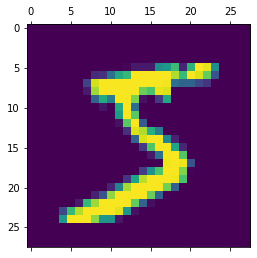

In [7]:
plt.matshow(X_train[0])

In [8]:
Y_train[0]

5

In [9]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
X_train_reshape = X_train.reshape(len(X_train),28*28)
X_test_reshape = X_test.reshape(len(X_test),28*28)

In [13]:
X_test_reshape.shape

(10000, 784)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_reshape,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4712 - accuracy: 0.8760
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3034 - accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9209
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9228
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2617 - accuracy: 0.9266
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2586 - accuracy: 0.9283
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9301
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2531 - accuracy: 0.9297
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.251

In [15]:
model.evaluate(X_test_reshape,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2630 - accuracy: 0.9271


[0.26296356320381165, 0.9271000027656555]

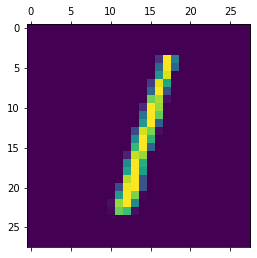

In [25]:
plt.matshow(X_test[2])

In [21]:
y_pred = model.predict(X_test_reshape)

In [26]:
y_pred[2]

array([1.15392286e-04, 9.94198799e-01, 6.71968579e-01, 2.86054403e-01,
       2.05343850e-02, 1.35674655e-01, 1.18711561e-01, 4.39799763e-02,
       3.94497156e-01, 3.09222136e-02], dtype=float32)

In [27]:
np.argmax(y_pred[2])

1

In [28]:
y_pred_label=[np.argmax(i) for i in y_pred]

In [29]:
y_pred_label[:4]

[7, 2, 1, 0]

In [31]:
Y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [36]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_label)
# Printing the result
print('Confusion_matrix: ',cm)

Confusion_matrix:  tf.Tensor(
[[ 961    0    1    2    0    5    6    4    1    0]
 [   0 1110    3    2    0    1    4    2   13    0]
 [   5    8  917   17    9    5   13   13   41    4]
 [   3    0   15  924    1   22    3   10   25    7]
 [   1    1    4    2  927    0    7    4    8   28]
 [   7    2    1   34   12  781   13    8   28    6]
 [  11    3    8    1    7   13  910    2    3    0]
 [   2    6   20    4    6    1    0  952    4   33]
 [   6    6    6   19    9   24   10   11  874    9]
 [  10    7    1    9   32    6    0   24    5  915]], shape=(10, 10), dtype=int32)


Text(69.0, 0.5, 'Truth')

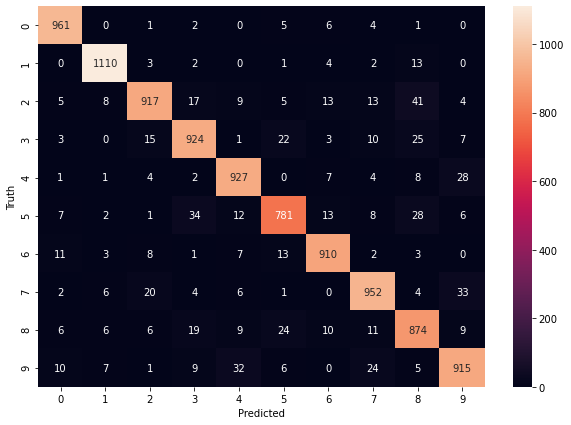

In [38]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Add Hidden Layer

In [39]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_reshape,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2773 - accuracy: 0.9216
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1250 - accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0846 - accuracy: 0.9749
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0642 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0522 - accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0411 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0332 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0278 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0235 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.018

In [40]:
model.evaluate(X_test_reshape,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0829 - accuracy: 0.9758


[0.08285333216190338, 0.9757999777793884]

Text(69.0, 0.5, 'Truth')

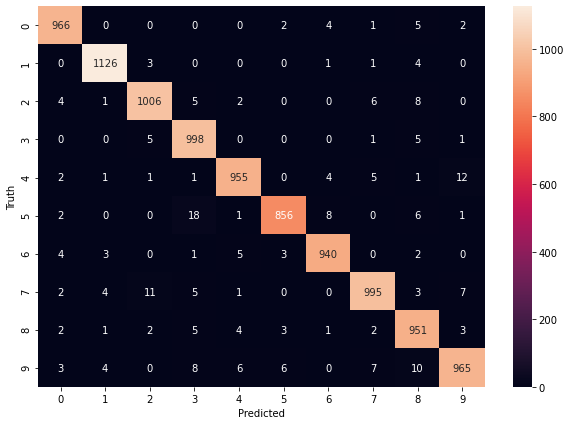

In [41]:
y_pred = model.predict(X_test_reshape)
y_pred_label=[np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_label)
# Printing the result
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Use Flatten from Keras for 28*28 PIXAL

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_reshape,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2746 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1256 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0887 - accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0661 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0532 - accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0429 - accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0353 - accuracy: 0.9887
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0285 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0252 - accuracy: 0.9919
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019